<a href="https://colab.research.google.com/github/llukitas/Interbank_Kaggle/blob/master/Interbank_Kaggle_conection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Instalacion de utilitarios Pyspark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [42]:
!pip install pyspark

In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [0]:
# Required libraries
import json 
import zipfile
import os
import pandas as pd
from PIL import Image
import random

In [45]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'
###############################################
# IMPORTANTE 
# Copia en la siguiente línea el contenido de tu archivo kaggle.json 
api_token = {"username":"gerardolucas","key":"444461feeef02a392fb2fd368d5fa8b2"}
###############################################
with open('/root/.kaggle/kaggle.json', 'w') as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [46]:
!kaggle competitions download -c interbank-internacional-2019

ib_base_sunat.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ib_base_campanias.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ib_base_digital.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ib_base_vehicular.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ib_base_reniec.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ib_base_rcc.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ib_base_inicial_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ib_base_inicial_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
ls

ib_base_campanias.csv          ib_base_sunat.csv
ib_base_campanias.csv.zip      ib_base_sunat.csv.zip
ib_base_digital.csv            ib_base_vehicular.csv
ib_base_digital.csv.zip        ib_base_vehicular.csv.zip
ib_base_inicial_test.csv       sample_data/
ib_base_inicial_test.csv.zip   spark-2.3.4-bin-hadoop2.7/
ib_base_inicial_train.csv      spark-2.3.4-bin-hadoop2.7.tgz
ib_base_inicial_train.csv.zip  spark-2.3.4-bin-hadoop2.7.tgz.1
ib_base_rcc.csv                spark-2.4.4-bin-hadoop2.7/
ib_base_rcc.csv.zip            spark-2.4.4-bin-hadoop2.7.tgz
ib_base_reniec.csv             spark-2.4.4-bin-hadoop2.7.tgz.1
ib_base_reniec.csv.zip


In [0]:
for file in os.listdir():
 if file.endswith('.zip'):
  zip_ref = zipfile.ZipFile(file, 'r')
  zip_ref.extractall()
  zip_ref.close()

In [0]:
train=spark.read.csv('/content/ib_base_inicial_train.csv',sep=',', header=True, inferSchema=True)
sunat= spark.read.csv('/content/ib_base_sunat.csv',sep=',', header=True, inferSchema=True)
p_test=spark.read.csv('/content/ib_base_inicial_test.csv',sep=',',header=True,inferSchema=True)
reniec=spark.read.csv('/content/ib_base_reniec.csv',sep=',', header=True, inferSchema=True)
vehicular= spark.read.csv('/content/ib_base_vehicular.csv',sep=',', header=True, inferSchema=True)
campanhas=spark.read.csv('/content/ib_base_campanias.csv',sep=',',header=True,inferSchema=True)
digital=spark.read.csv('/content/ib_base_digital.csv',sep=',',header=True,inferSchema=True)
rcc=spark.read.csv('/content/ib_base_rcc.csv',sep=',',header=True,inferSchema=True)


In [49]:
train.show(5)
sunat.show(5)
p_test.show(5)
reniec.show(5)
vehicular.show(5)
campanhas.show(5)
digital.show(5)
rcc.show(5)

+------+----------+---------+------+-----+------------+--------------+
|codmes|id_persona|codtarget|margen|  cem|ingreso_neto|linea_ofrecida|
+------+----------+---------+------+-----+------------+--------------+
|201901|    165747|        0|  -5.0|  1.0|      1781.0|          1700|
|201903|    100117|        0|  -5.0|478.0|      2106.0|          2100|
|201901|     65751|        1|342.99|687.0|      3083.0|          4600|
|201901|     58047|        0|  -5.0|182.0|      1814.0|          3600|
|201901|    113221|        0|  -5.0|582.0|      2153.0|          4300|
+------+----------+---------+------+-----+------------+--------------+
only showing top 5 rows

+----------+-----------+----------+
|id_persona|activ_econo|meses_alta|
+----------+-----------+----------+
|    174454|   Grupo_11|        70|
|    245154|   Grupo_15|        27|
|      1211|   Grupo_07|        20|
|    146154|   Grupo_15|       135|
|     87697|   Grupo_07|        55|
+----------+-----------+----------+
only showing

In [50]:
print(campanhas.count())

#print(DS_Renovacion_prest.count())

4890317


In [51]:
#4.2 Variable objetivo
print(campanhas.count())
campanhas.groupBy('id_persona').count().show()

4890317
+----------+-----+
|id_persona|count|
+----------+-----+
|    109608|   43|
|    118185|   51|
|    191355|   48|
|      1238|   27|
|     76885|    9|
|    151871|   20|
|      6397|    9|
|     27484|   32|
|     45011|   32|
|    146411|   37|
|    143737|   20|
|     12940|   60|
|     80006|   20|
|    100274|   46|
|     26087|   63|
|    101627|   29|
|    117987|   10|
|    150087|   80|
|    156527|    8|
|    173691|   37|
+----------+-----+
only showing top 20 rows



In [52]:
from pyspark.sql.functions import desc
train.groupBy('id_persona').count().show()
#train.groupBy('id_persona').count().withColumnRenamed("count","distinct_name").sort(desc("count")).show()

+----------+-----+
|id_persona|count|
+----------+-----+
|     67294|    1|
|    220404|    1|
|    203894|    2|
|    137377|    1|
|     74281|    1|
|     41751|    1|
|    150051|    1|
|    114851|    2|
|    119517|    1|
|    171094|    1|
|     23364|    2|
|     92834|    1|
|    103747|    2|
|    181209|    2|
|    229254|    1|
|    135267|    2|
|    198430|    1|
|    240209|    1|
|     38311|    1|
|     47711|    2|
+----------+-----+
only showing top 20 rows



In [53]:
# Lectura desde un archivo fisico
train.filter(train.id_persona=='238177').show()

+------+----------+---------+------+-----+------------+--------------+
|codmes|id_persona|codtarget|margen|  cem|ingreso_neto|linea_ofrecida|
+------+----------+---------+------+-----+------------+--------------+
|201903|    238177|        0|  -5.0|192.0|       771.0|           700|
|201904|    238177|        0|  -5.0|192.0|       771.0|           700|
|201901|    238177|        0|  -5.0|192.0|       771.0|           700|
+------+----------+---------+------+-----+------------+--------------+



In [54]:
# Lectura desde un archivo fisico
train.filter(train.id_persona=='38311').show()

+------+----------+---------+------+-----+------------+--------------+
|codmes|id_persona|codtarget|margen|  cem|ingreso_neto|linea_ofrecida|
+------+----------+---------+------+-----+------------+--------------+
|201902|     38311|        0|  -5.0|545.0|      2575.0|          9000|
+------+----------+---------+------+-----+------------+--------------+



#2.  Cargando los datos en formato Spark

# 4. Exploracion de datos

# 6. Entrenamiento del Algoritmo (Regresion Logistica)

In [0]:
# Definicion de muestra de entrenamiento y Validacion

training_df,test_df=model_df_Renovacion_prest.randomSplit([0.5,0.5])

# Tamaño de muestra
print(training_df.count(),test_df.count())


43667 43834


In [0]:
# Modelamiento de Regresion Logistica

from pyspark.ml.classification import LogisticRegression

log_reg=LogisticRegression(labelCol='FLAG_VENTA').fit(training_df)

In [0]:
# Revision
log_reg.coefficients

DenseVector([0.0, -0.0001, -0.1279, 0.2708, -0.0134, 0.0588, 0.2258, -0.0534, -0.015, 0.0764, 0.5859, -0.0888, 0.3622, 0.2397, 0.2569])

In [0]:
# Aplicando sobre la data Train el modelo identificado

train_results=log_reg.evaluate(training_df).predictions


# Verificando las probabilidad en los clientes con compra

train_results.filter(train_results['FLAG_VENTA']==1).select(['FLAG_VENTA','prediction','probability']).show(10,False)

+----------+----------+-----------------------------------------+
|FLAG_VENTA|prediction|probability                              |
+----------+----------+-----------------------------------------+
|1         |0.0       |[0.960811047991409,0.039188952008590995] |
|1         |0.0       |[0.9627564916224501,0.037243508377549736]|
|1         |0.0       |[0.9289229829719605,0.0710770170280394]  |
|1         |0.0       |[0.9706507886279174,0.02934921137208263] |
|1         |0.0       |[0.9729403575925696,0.027059642407430414]|
|1         |0.0       |[0.9717446610843462,0.02825533891565373] |
|1         |0.0       |[0.973680090813619,0.026319909186380965] |
|1         |0.0       |[0.9680224083601019,0.031977591639898155]|
|1         |0.0       |[0.9709365941166367,0.029063405883363293]|
|1         |0.0       |[0.9715414676116869,0.028458532388313154]|
+----------+----------+-----------------------------------------+
only showing top 10 rows



# 7. Evaluacion de poder predictivo

In [0]:
# Aplicando el modelo predictivo

transformed = log_reg.transform(test_df)

In [0]:
test_df.show(5)

+----------+--------------------+
|FLAG_VENTA|            features|
+----------+--------------------+
|         0|(15,[0,1],[1936.0...|
|         0|(15,[0,1],[1940.0...|
|         0|(15,[0,1],[1950.0...|
|         0|(15,[0,1],[2200.0...|
|         0|(15,[0,1],[6071.0...|
+----------+--------------------+
only showing top 5 rows



In [0]:
# Revision
transformed.show(3,False)

+----------+--------------------------+----------------------------------------+-----------------------------------------+----------+
|FLAG_VENTA|features                  |rawPrediction                           |probability                              |prediction|
+----------+--------------------------+----------------------------------------+-----------------------------------------+----------+
|0         |(15,[0,1],[1936.0,2296.0])|[3.3739812480196534,-3.3739812480196534]|[0.9668814149075142,0.033118585092485824]|0.0       |
|0         |(15,[0,1],[1940.0,2296.0])|[3.3739336397500175,-3.3739336397500175]|[0.9668798903737859,0.033120109626214256]|0.0       |
|0         |(15,[0,1],[1950.0,2296.0])|[3.3738146190759286,-3.3738146190759286]|[0.9668760787429466,0.03312392125705343] |0.0       |
+----------+--------------------------+----------------------------------------+-----------------------------------------+----------+
only showing top 3 rows



In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = transformed.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.5963761284376882


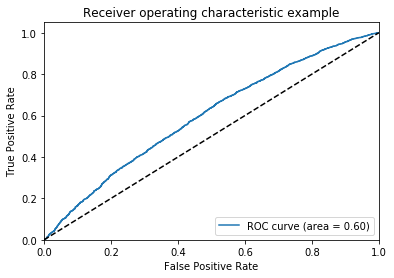

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#8. Aplicacion de modelos adicionales

##8.1 Algoritmo de Arbol de Clasficacion

In [0]:
# Arbol de clasificacion

from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="FLAG_VENTA")
dt_model = dt.fit(training_df)

dt_prediction = dt_model.transform(test_df)

dt_prediction.select("prediction", "FLAG_VENTA", "features").show()

+----------+----------+--------------------+
|prediction|FLAG_VENTA|            features|
+----------+----------+--------------------+
|       0.0|         0|(15,[0,1],[1936.0...|
|       0.0|         0|(15,[0,1],[1940.0...|
|       0.0|         0|(15,[0,1],[1950.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[6071.0...|
|       0.0|         0|(15,[0,1],[6317.0...|
|       0.0|         0|(15,[0,1],[6500.0...|
|       0.0|         0|(15,[0,1],[6510.0...|
|       0.0|         0|(15,[0,1],[7392.0...|
|       0.0|         0|(15,[0,1],[7802.0...|
|       0.0|         0|(15,[0,1],[11405....|
|       0.0|         0|(15,[0,1],[11532....|
|       0.0|         0|(15,[0,1],[11818....|
|       0.0|         0|(15,[0,1],[12439....|
|       0.0|         0|(15,[0,1],[12828....|
|       0.0|         0|(15,[0,1],[12898....|
|       0.0|         0|(15,[0,1],[12921....|
|       0.0|         0|(15,[0,1],[13000....|
|       0.0|         0|(15,[0,1],[13000....|
|       0.

In [0]:
# Reglas del arbol
#print(dt_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_e6268186c0e0) of depth 0 with 1 nodes
  Predict: 0.0



In [0]:
# Evaluacion del poder predictivo del arbol
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="FLAG_VENTA", predictionCol="prediction", metricName="accuracy")

dt_accuracy = evaluator.evaluate(dt_prediction)
print("Accuracy of DecisionTreeClassifier is = %g"% (dt_accuracy))
print("Test Error of DecisionTreeClassifier = %g " % (1.0 - dt_accuracy))


Accuracy of DecisionTreeClassifier is = 0.961126
Test Error of DecisionTreeClassifier = 0.0388739 


In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = dt_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.5


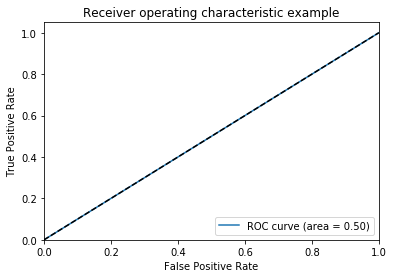

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##8.2 Algoritmo Random Forest

In [0]:
# Aplicacion de Algoritmo Random Fores para modelamiento de clasificacion

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="FLAG_VENTA", numTrees=150)
rf_model = rf.fit(training_df)

rf_prediction = rf_model.transform(test_df)

rf_prediction.select("prediction", "FLAG_VENTA", "features").show()

+----------+----------+--------------------+
|prediction|FLAG_VENTA|            features|
+----------+----------+--------------------+
|       0.0|         0|(15,[0,1],[1936.0...|
|       0.0|         0|(15,[0,1],[1940.0...|
|       0.0|         0|(15,[0,1],[1950.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[6071.0...|
|       0.0|         0|(15,[0,1],[6317.0...|
|       0.0|         0|(15,[0,1],[6500.0...|
|       0.0|         0|(15,[0,1],[6510.0...|
|       0.0|         0|(15,[0,1],[7392.0...|
|       0.0|         0|(15,[0,1],[7802.0...|
|       0.0|         0|(15,[0,1],[11405....|
|       0.0|         0|(15,[0,1],[11532....|
|       0.0|         0|(15,[0,1],[11818....|
|       0.0|         0|(15,[0,1],[12439....|
|       0.0|         0|(15,[0,1],[12828....|
|       0.0|         0|(15,[0,1],[12898....|
|       0.0|         0|(15,[0,1],[12921....|
|       0.0|         0|(15,[0,1],[13000....|
|       0.0|         0|(15,[0,1],[13000....|
|       0.

In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = rf_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.5908150103246268


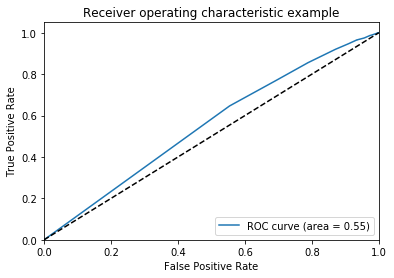

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
# Extra identificador de variables importantes
rf_model.featureImportances

SparseVector(15, {0: 0.3675, 1: 0.4138, 2: 0.0206, 3: 0.044, 4: 0.0048, 5: 0.0014, 6: 0.0015, 7: 0.0099, 8: 0.0049, 10: 0.099, 12: 0.0002, 13: 0.0284, 14: 0.004})

In [0]:
# Diccionario de caracteristicas
training_df.schema["features"].metadata["ml_attr"]["attrs"]

{'binary': [{'idx': 2, 'name': 'REGION_Vector_LIMA MODERNA'},
  {'idx': 3, 'name': 'REGION_Vector_CENTRO'},
  {'idx': 4, 'name': 'REGION_Vector_NORTE'},
  {'idx': 5, 'name': 'REGION_Vector_LIMA NORTE'},
  {'idx': 6, 'name': 'REGION_Vector_SUR'},
  {'idx': 7, 'name': 'REGION_Vector_LIMA ESTE'},
  {'idx': 8, 'name': 'REGION_Vector_LIMA SUR'},
  {'idx': 9, 'name': 'REGION_Vector_LIMA CENTRO'},
  {'idx': 10, 'name': 'REGION_Vector_ORIENTE'},
  {'idx': 11, 'name': 'REGION_Vector_CALLAO'},
  {'idx': 12, 'name': 'REGION_Vector_SIERRA CENTRAL'},
  {'idx': 13, 'name': 'REGION_Vector_LIMA PROVINCIA'},
  {'idx': 14, 'name': 'REGION_Vector_OESTE'}],
 'numeric': [{'idx': 0, 'name': 'LINEA_RENOVADO'},
  {'idx': 1, 'name': 'SUELDO_ESTIMADO'}]}

## 8.3  Algoritmo de Naive Bayes

In [0]:
# Aplicacion de Algoritmo Random Fores para modelamiento de clasificacion

from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(labelCol="FLAG_VENTA")
nb_model = nb.fit(training_df)

nb_prediction = nb_model.transform(test_df)

nb_prediction.select("prediction", "FLAG_VENTA", "features").show()

+----------+----------+--------------------+
|prediction|FLAG_VENTA|            features|
+----------+----------+--------------------+
|       0.0|         0|(15,[0,1],[1950.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[6071.0...|
|       0.0|         0|(15,[0,1],[6317.0...|
|       0.0|         0|(15,[0,1],[6500.0...|
|       0.0|         0|(15,[0,1],[6786.0...|
|       1.0|         0|(15,[0,1],[6903.0...|
|       0.0|         0|(15,[0,1],[7392.0...|
|       0.0|         0|(15,[0,1],[7802.0...|
|       1.0|         0|(15,[0,1],[10000....|
|       1.0|         0|(15,[0,1],[11532....|
|       0.0|         0|(15,[0,1],[12005....|
|       1.0|         0|(15,[0,1],[12105....|
|       1.0|         0|(15,[0,1],[12460....|
|       1.0|         0|(15,[0,1],[12470....|
|       1.0|         0|(15,[0,1],[12898....|
|       1.0|         0|(15,[0,1],[13000....|
|       1.

In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = nb_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.5912854435526248


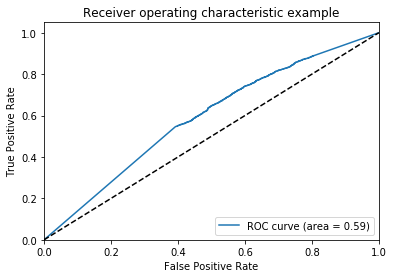

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##8.4  * Algoritmo de clasificacion Support Vector Machine

In [0]:

from pyspark.ml.classification import LinearSVC

svm = NaiveBayes(labelCol="FLAG_VENTA")
svm_model = svm.fit(training_df)

svm_prediction = svm_model.transform(test_df)

svm_prediction.select("prediction", "FLAG_VENTA", "features").show()

+----------+----------+--------------------+
|prediction|FLAG_VENTA|            features|
+----------+----------+--------------------+
|       0.0|         0|(15,[0,1],[1950.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[2200.0...|
|       0.0|         0|(15,[0,1],[6071.0...|
|       0.0|         0|(15,[0,1],[6317.0...|
|       0.0|         0|(15,[0,1],[6500.0...|
|       0.0|         0|(15,[0,1],[6786.0...|
|       1.0|         0|(15,[0,1],[6903.0...|
|       0.0|         0|(15,[0,1],[7392.0...|
|       0.0|         0|(15,[0,1],[7802.0...|
|       1.0|         0|(15,[0,1],[10000....|
|       1.0|         0|(15,[0,1],[11532....|
|       0.0|         0|(15,[0,1],[12005....|
|       1.0|         0|(15,[0,1],[12105....|
|       1.0|         0|(15,[0,1],[12460....|
|       1.0|         0|(15,[0,1],[12470....|
|       1.0|         0|(15,[0,1],[12898....|
|       1.0|         0|(15,[0,1],[13000....|
|       1.

In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = svm_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.5912854435526248


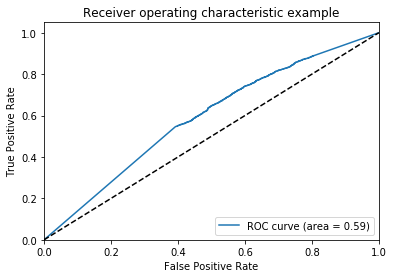

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 8.5 * Modelo de Red neuronal multicapa

In [0]:
from pyspark.ml.classification import MultilayerPerceptronClassifier


# Especificando las capas para la Red Neuronal:
# Input de las capas es de tamanio 4 (features), dos capas intermedias de tmannio 5 and 4
# y el output de salida es de tamanio 2 (classes)

#Tener mucho cuidado al definir los valores ingresados en la red neuronal!!!!!
layers = [15, 5, 4, 2]


mlp = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234, labelCol="FLAG_VENTA")
mlp_model = mlp.fit(training_df)

mlp_prediction = mlp_model.transform(test_df)


In [0]:
mlp_prediction.describe()

DataFrame[summary: string, FLAG_VENTA: string, prediction: string]

In [0]:
# LLamando a las librerias de evaluacion de modelamiento

from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = mlp_prediction.select(['probability', 'FLAG_VENTA'])
 
## prepare score-label set
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)
 
metrics = metric(scoreAndLabels)
print("The ROC score is (@numTrees=200): ", metrics.areaUnderROC)

The ROC score is (@numTrees=200):  0.5090459415732563


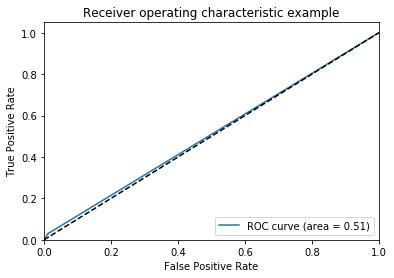

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
 
fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()